<a href="https://colab.research.google.com/github/AMARTYA2020/AMARTYA2020/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso



In [ ]:

# analysing first 5 rows
df = pd.read_csv('/content/cars data.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Petrol,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Petrol,Dealer,Manual,0


In [ ]:
# Check the tuples and columns to ensure the the the total parameters
df.shape


(301, 9)

In [ ]:

# ensure if there is any missing values
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#info of the datasets
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:

# Encoding the categorical data we convert the string of fuel seller and transmissio
# as numbers for effective ML prediction
# petrol=0, diseal =1, CNG = 2        Dealer,Transmission = Binary 0,1

df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)


df.replace({'Seller_Type':{'Dealer':0, 'Individual':1,}},inplace=True)


df.replace({'Transmission':{'Manual':0, 'Automatic':1,}},inplace=True)


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,0,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,0,0,0,0


In [ ]:

#splitting data into training and testing data
# Here selling price becomes our target so we need to remove car name also
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']


In [ ]:

#Splitting training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.1, random_state=4)



In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:

#Using Linear regression MODEL TRAINING:
lr = LinearRegression()



In [ ]:
#we use fit function to train our data
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#         ANALYZE THE MODEL:
#prediction on Training data
#model will predict price against other parameters and store in variablbe
predict_training_data = lr.predict(X_train)

In [ ]:
#we compare values predicted by model with the orignal value (Y_train) target
#R-squared is a statistical measure that represents the goodness of fit of a regression model.
# The more the value of r-square near to 1, the better is the model. 
# alternative Mean absolute error,root mean square error

error_score = metrics.r2_score(Y_train, 
predict_training_data)
print("R square error: ", error_score)


R square error:  0.7940685809729338


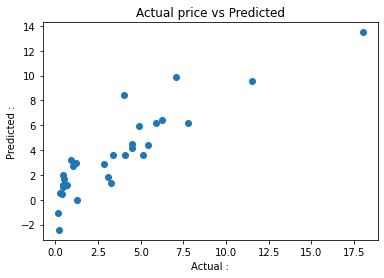

In [ ]:
# actual price VS predicted price
plt.scatter(Y_train, 
predict_training_data)
plt.xlabel("Actual :")
plt.ylabel("Predicted :")
plt.title("Actual price vs Predicted")
plt.show()

In [ ]:
# we see that most of the values are closer to each other as the
# price increase there is some gaps VAlues are close to orignal


#Predict on testing data
predict_testing_data = lr.predict(X_test)

In [ ]:

error_score = metrics.r2_score(Y_test, 
predict_testing_data)
print("R square error: ", error_score)

R square error:  0.7136509202345891


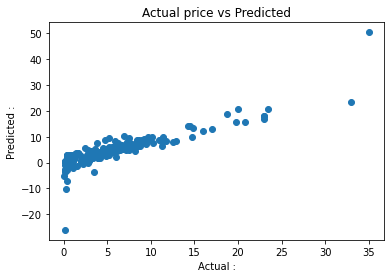

In [ ]:
plt.scatter(Y_test, 
predict_testing_data)
plt.xlabel("Actual :")
plt.ylabel("Predicted :")
plt.title("Actual price vs Predicted")
plt.show()

In [ ]:
# most points lie in same line good prediction

